## This notebook tests SGD and Random Forest classifier architecture vs final DNN classifier

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

from data_pipeline import data_pipeline
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [10]:
DATA_PATH = 'data/'

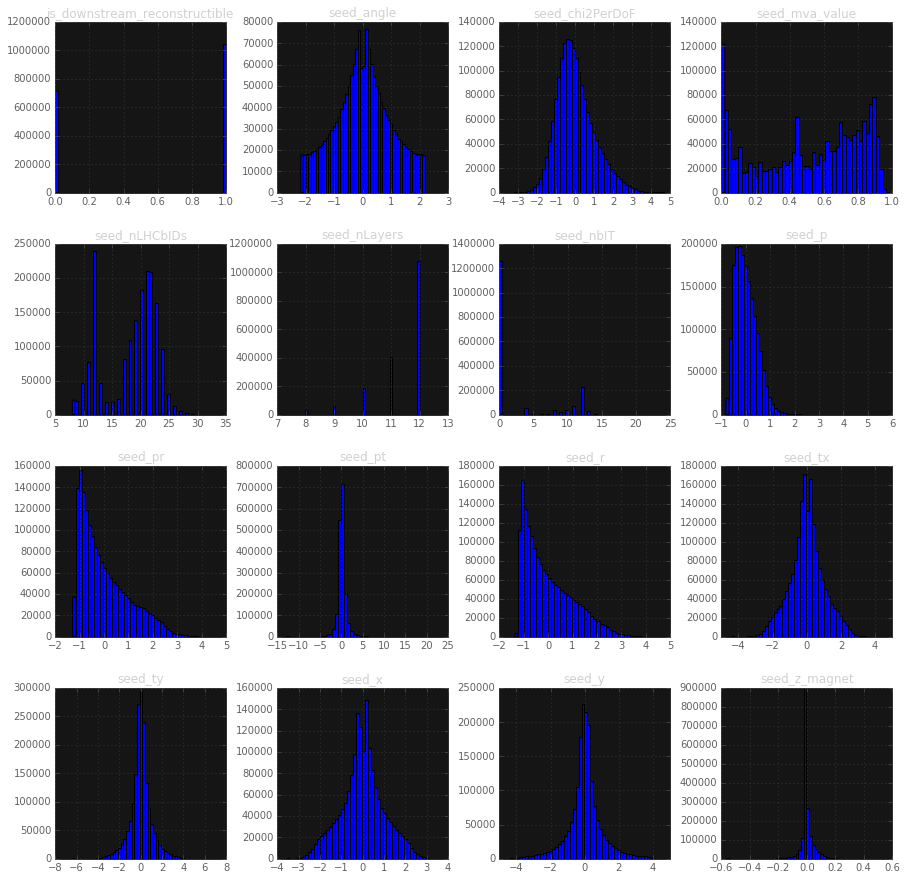

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754766 entries, 1042314 to 3481
Data columns (total 16 columns):
is_downstream_reconstructible    bool
seed_chi2PerDoF                  float64
seed_p                           float64
seed_pt                          float64
seed_nLHCbIDs                    uint32
seed_nbIT                        uint32
seed_nLayers                     uint32
seed_x                           float64
seed_y                           float64
seed_tx                          float64
seed_ty                          float64
seed_mva_value                   float64
seed_angle                       float64
seed_pr                          float64
seed_z_magnet                    float64
seed_r                           float64
dtypes: bool(1), float64(12), uint32(3)
memory usage: 195.8 MB


In [11]:
data = pd.read_pickle(DATA_PATH + 'train_data.pkl')
data = data.sample(frac=1, random_state=137)
pipeline = data_pipeline()
data = pipeline.fit_transform(data)
data = data.drop(['index'], axis=1)
data.hist(bins=50, figsize=(15,15))
plt.show()
data.info()

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
x_train = train_set.drop(['is_downstream_reconstructible'], axis=1)
y_train = train_set['is_downstream_reconstructible'].copy()
x_train.info()
y_train.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403812 entries, 2287395 to 103571
Data columns (total 15 columns):
seed_chi2PerDoF    1403812 non-null float64
seed_p             1403812 non-null float64
seed_pt            1403812 non-null float64
seed_nLHCbIDs      1403812 non-null uint32
seed_nbIT          1403812 non-null uint32
seed_nLayers       1403812 non-null uint32
seed_x             1403812 non-null float64
seed_y             1403812 non-null float64
seed_tx            1403812 non-null float64
seed_ty            1403812 non-null float64
seed_mva_value     1403812 non-null float64
seed_angle         1403812 non-null float64
seed_pr            1403812 non-null float64
seed_z_magnet      1403812 non-null float64
seed_r             1403812 non-null float64
dtypes: float64(12), uint32(3)
memory usage: 155.3 MB


True     832684
False    571128
Name: is_downstream_reconstructible, dtype: int64

In [6]:
x_test = test_set.drop(['is_downstream_reconstructible'], axis=1)
y_test = test_set['is_downstream_reconstructible'].copy()
x_test.info()
y_test.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350954 entries, 980894 to 1148924
Data columns (total 15 columns):
seed_chi2PerDoF    350954 non-null float64
seed_p             350954 non-null float64
seed_pt            350954 non-null float64
seed_nLHCbIDs      350954 non-null uint32
seed_nbIT          350954 non-null uint32
seed_nLayers       350954 non-null uint32
seed_x             350954 non-null float64
seed_y             350954 non-null float64
seed_tx            350954 non-null float64
seed_ty            350954 non-null float64
seed_mva_value     350954 non-null float64
seed_angle         350954 non-null float64
seed_pr            350954 non-null float64
seed_z_magnet      350954 non-null float64
seed_r             350954 non-null float64
dtypes: float64(12), uint32(3)
memory usage: 38.8 MB


True     207977
False    142977
Name: is_downstream_reconstructible, dtype: int64

In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42, n_iter=10)
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("train roc:{:.5}".format(roc_auc_score(y_train, sgd.predict_proba(x_train)[:,1])))
print("train acc: {:.5}".format(sgd.score(x_train, y_train)))

print("test roc:{:.5}".format(roc_auc_score(y_test, sgd.predict_proba(x_test)[:,1])))
print("test acc: {:.5}".format(sgd.score(x_test, y_test)))

train roc:0.85802
train acc: 0.79264
test roc:0.85783
test acc: 0.79265


In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("confusion matrix:\n", confusion_matrix(y_test, sgd.predict(x_test)))
print("Precision: {:1.4}".format(precision_score(y_test, sgd.predict(x_test))))
print("Recall: {:9.4}".format(recall_score(y_test, sgd.predict(x_test))))
print("F1: {:13.4}".format(f1_score(y_test, sgd.predict(x_test))))

confusion matrix:
 [[ 98160  44817]
 [ 27955 180022]]
Precision: 0.8007
Recall:    0.8656
F1:        0.8319


In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_jobs=3, max_depth=20)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=3, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [11]:
print("train roc:{:.5}".format(roc_auc_score(y_train, forest.predict_proba(x_train)[:,1])))
print("train acc: {:.5}".format(forest.score(x_train, y_train)))

print("test roc:{:.5}".format(roc_auc_score(y_test, forest.predict_proba(x_test)[:,1])))
print("test acc: {:.5}".format(forest.score(x_test, y_test)))

train roc:0.9602
train acc: 0.91468
test roc:0.92452
test acc: 0.87147


In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("confusion matrix:\n", confusion_matrix(y_test, forest.predict(x_test)))
print("Precision: {:1.4}".format(precision_score(y_test, forest.predict(x_test))))
print("Recall: {:9.4}".format(recall_score(y_test, forest.predict(x_test))))
print("F1: {:13.4}".format(f1_score(y_test, forest.predict(x_test))))

confusion matrix:
 [[110179  32798]
 [ 12310 195667]]
Precision: 0.8564
Recall:    0.9408
F1:        0.8966


In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr, label=None):
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

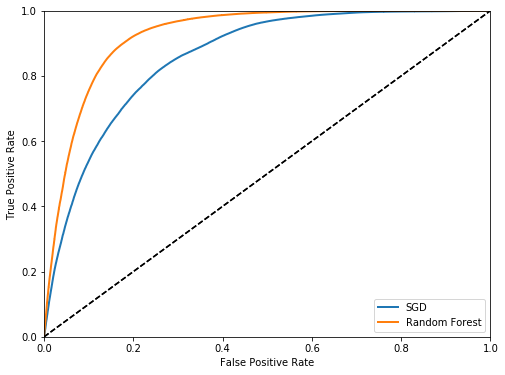

In [14]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, sgd.predict_proba(x_test)[:,1])
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, forest.predict_proba(x_test)[:,1])
plt.figure(figsize=(8,6))
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [15]:
print("Random Forest auc score {:.3}".format(roc_auc_score(y_test, forest.predict_proba(x_test)[:,1])))
print("SGD auc score {:.3}".format(roc_auc_score(y_test, sgd.predict_proba(x_test)[:,1])))

Random Forest auc score 0.925
SGD auc score 0.858


In [16]:
from DNN_softmax import DNNSoftmaxClf
DNNclf = DNNSoftmaxClf(act_fun=tf.nn.relu,
                       batch_size=100,
                       input_size=15,
                       hidden_layers=3,
                       weights_initializer=tf.contrib.layers.xavier_initializer(),
                       layer_size=100,
                       optimizer=tf.train.AdamOptimizer,
                      )
DNNclf.restore_model('best_models/Tue Jun 20 22:27:52 2017/')


INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
['DNN/hidden_0/kernel:0', 'DNN/hidden_0/bias:0', 'DNN/batch_normalization/beta:0', 'DNN/batch_normalization/gamma:0', 'DNN/batch_normalization/moving_mean:0', 'DNN/batch_normalization/moving_variance:0', 'DNN/hidden_1/kernel:0', 'DNN/hidden_1/bias:0', 'DNN/batch_normalization_1/beta:0', 'DNN/batch_normalization_1/gamma:0', 'DNN/batch_normalization_1/moving_mean:0', 'DNN/batch_normalization_1/moving_variance:0', 'DNN/hidden_2/kernel:0', 'DNN/hidden_2/bias:0', 'DNN/batch_normalization_2/beta:0', 'DNN/batch_normalization_2/gamma:0', 'DNN/batch_normalization_2/moving_mean:0', 'DNN/batch_normalization_2/moving_variance:0', 'DNN/outputs/kernel:0', 'DNN/outputs/bias:0', 'DNN/batch_normalization_3/beta:0', 'DNN/batch_normalization_3/gamma:0', 'DNN/batch_normalization_3/moving_mean:0', 'DNN/batch_normalization_3/moving_variance:0']


In [17]:
print("train roc:{:.5}".format(roc_auc_score(y_train, DNNclf.predict_proba(x_train)[:,1])))
print("train acc: {:.5}".format(DNNclf.score(x_train, y_train)))

print("test roc:{:.5}".format(roc_auc_score(y_test, DNNclf.predict_proba(x_test)[:,1])))
print("test acc: {:.5}".format(DNNclf.score(x_test, y_test)))

INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
train roc:0.94047
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
train acc: 0.88638
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
test roc:0.93911
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
test acc: 0.88424


In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("confusion matrix:\n", confusion_matrix(y_test, DNNclf.predict(x_test)))
print("Precision: {:1.4}".format(precision_score(y_test, DNNclf.predict(x_test))))
print("Recall: {:9.4}".format(recall_score(y_test, DNNclf.predict(x_test))))
print("F1: {:13.4}".format(f1_score(y_test, DNNclf.predict(x_test))))

INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
confusion matrix:
 [[114349  28628]
 [ 11998 195979]]
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
Precision: 0.8725
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
Recall:    0.9423
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
F1:        0.9061


INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/


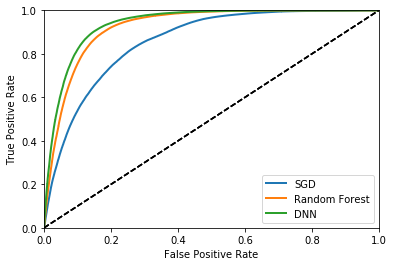

In [19]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, sgd.predict_proba(x_test)[:,1])
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, forest.predict_proba(x_test)[:,1])
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, DNNclf.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_dnn, tpr_dnn, "DNN")
plt.legend(loc="lower right")

## Loading previously unseen dataset and testing classifiers

In [20]:
new_data = pd.read_pickle(DATA_PATH + 'test_data.pkl')
new_data = pipeline.fit_transform(new_data)
new_data = new_data.drop(['index'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a81bd8dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a52c4e128>]], dtype=object)

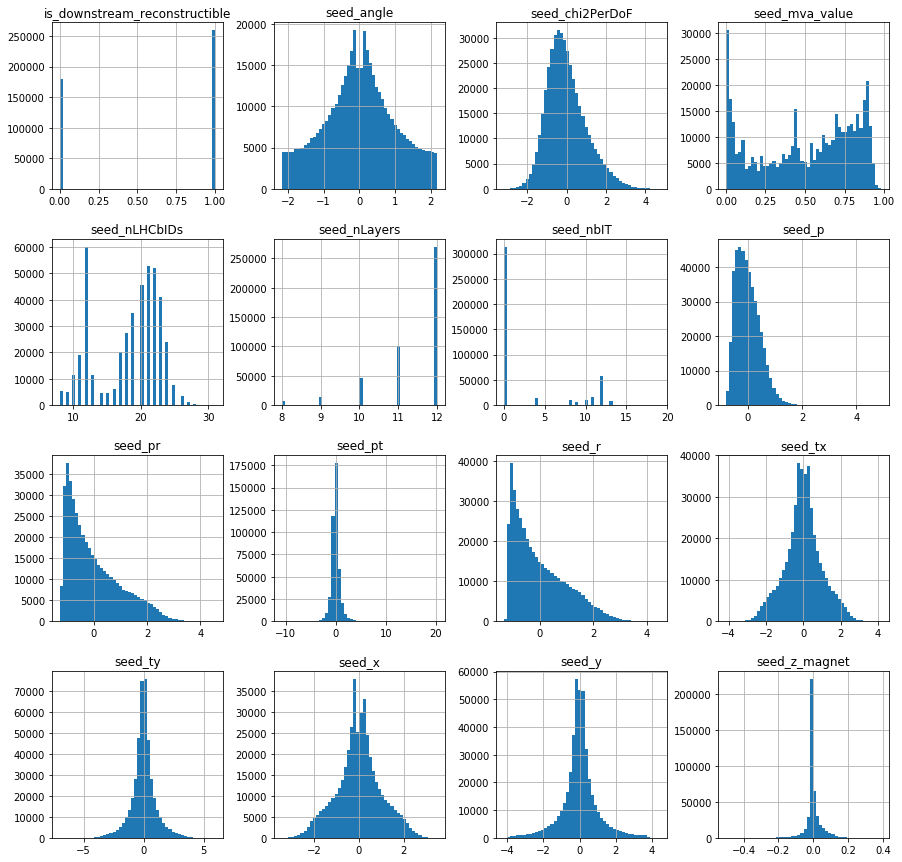

In [21]:
new_data.hist(bins=50, figsize=(15,15))

In [22]:
features = new_data.drop(['is_downstream_reconstructible'], axis=1)
labels = new_data['is_downstream_reconstructible'].copy()

# SGD

In [23]:
print("confusion matrix:\n", confusion_matrix(labels, sgd.predict(features)))
print("Precision: {:1.4}".format(precision_score(labels, sgd.predict(features))))
print("Recall: {:9.4}".format(recall_score(labels, sgd.predict(features))))
print("F1: {:13.4}".format(f1_score(labels, sgd.predict(features))))

print("train roc:{:.5}".format(roc_auc_score(labels, sgd.predict_proba(features)[:,1])))
print("train acc: {:.5}".format(sgd.score(features, labels)))

confusion matrix:
 [[122634  56439]
 [ 34846 224680]]
Precision: 0.7992
Recall:    0.8657
F1:        0.8312
train roc:0.85785
train acc: 0.79187


# Random Forest

In [24]:
print("confusion matrix:\n", confusion_matrix(labels, forest.predict(features)))
print("Precision: {:1.4}".format(precision_score(labels, forest.predict(features))))
print("Recall: {:9.4}".format(recall_score(labels, forest.predict(features))))
print("F1: {:13.4}".format(f1_score(labels, forest.predict(features))))

print("test roc:{:.5}".format(roc_auc_score(labels, forest.predict_proba(features)[:,1])))
print("test acc: {:.5}".format(forest.score(features, labels)))

confusion matrix:
 [[137542  41531]
 [ 15458 244068]]
Precision: 0.8546
Recall:    0.9404
F1:        0.8955
test roc:0.92381
test acc: 0.87007


# DNN

In [25]:
print("confusion matrix:\n", confusion_matrix(labels, DNNclf.predict(features)))
print("Precision: {:1.4}".format(precision_score(labels, DNNclf.predict(features))))
print("Recall: {:9.4}".format(recall_score(labels, DNNclf.predict(features))))
print("F1: {:13.4}".format(f1_score(labels, DNNclf.predict(features))))

print("test roc:{:.5}".format(roc_auc_score(labels, DNNclf.predict_proba(features)[:,1])))
print("test acc: {:.5}".format(DNNclf.score(features, labels)))

INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
confusion matrix:
 [[143340  35733]
 [ 14845 244681]]
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
Precision: 0.8726
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
Recall:    0.9428
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
F1:        0.9063
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
test roc:0.93858
INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/
test acc: 0.88468


INFO:tensorflow:Restoring parameters from best_models/Tue Jun 20 22:27:52 2017/


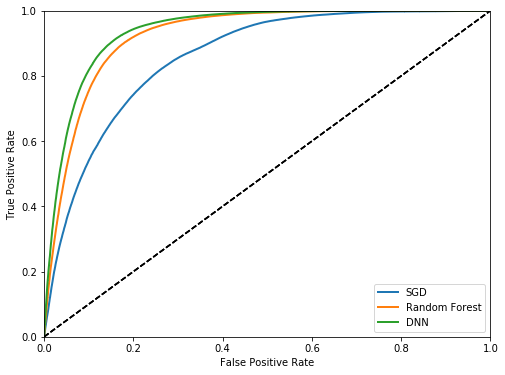

In [26]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(labels, sgd.predict_proba(features)[:,1])
fpr_forest, tpr_forest, thresholds_forest = roc_curve(labels, forest.predict_proba(features)[:,1])
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(labels, DNNclf.predict_proba(features)[:,1])
plt.figure(figsize=(8,6))
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_dnn, tpr_dnn, "DNN")
plt.legend(loc="lower right")